<a href="https://colab.research.google.com/github/kaaz10/Computer_Vision/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setting up Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Custom object detection using YOLO**

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.1/107.7 GB disk)


In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks"
!ls

/content/drive/MyDrive/Colab Notebooks
 Computer_Vision.ipynb			    'Week 2.ipynb'
 freshpoint-produce-101-apples-bananas.jpg   Week_3_MachineLearning.ipynb
'Introduction_to_Python (1).ipynb'	     Week4__Neural_Networks.ipynb
 Introduction_to_Python.ipynb		     yolo11n.pt
 runs					     yolov8n-cls.pt
 sample_image.jpg			     yolov8n.pt


**Training the Model**

In [4]:
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model (nano version for faster training)
model = YOLO('yolov8n.pt')

# Train the model using your custom dataset
# Here we train for 7 epochs as requested
model.train(data='/content/drive/MyDrive/Fruit_Data/data.yaml', epochs=7, imgsz=1216)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Fruit_Data/data.yaml, epochs=7, time=None, patience=100, batch=16, imgsz=1216, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

train: Scanning /content/drive/MyDrive/Fruit_Data/train/labels... 3306 images, 1360 backgrounds, 0 corrupt: 100%|██████████| 4656/4656 [28:43<00:00,  2.70it/s] 


train: New cache created: /content/drive/MyDrive/Fruit_Data/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 33, len(boxes) = 3759. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Fruit_Data/valid/labels... 589 images, 1 backgrounds, 0 corrupt: 100%|██████████| 589/589 [05:04<00:00,  1.93it/s]


val: New cache created: /content/drive/MyDrive/Fruit_Data/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 646. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000303, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1216 train, 1216 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 7 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/7         8G      1.432      5.686      2.116         34       1216: 100%|██████████| 291/291 [05:24<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:19<00:00,  1.02s/it]


                   all        589        646      0.627      0.151      0.117     0.0461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/7      7.65G      1.186      4.232      1.807         35       1216: 100%|██████████| 291/291 [05:12<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:24<00:00,  1.29s/it]


                   all        589        646      0.532      0.274      0.269      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/7      7.71G      1.127      3.487      1.741         30       1216: 100%|██████████| 291/291 [05:16<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:20<00:00,  1.08s/it]

                   all        589        646      0.461      0.345      0.316      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/7      7.64G       1.06      2.851      1.683         41       1216: 100%|██████████| 291/291 [05:15<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:19<00:00,  1.03s/it]

                   all        589        646      0.378       0.41      0.369      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/7      7.64G          1      2.449      1.621         31       1216: 100%|██████████| 291/291 [05:11<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:25<00:00,  1.35s/it]

                   all        589        646      0.435      0.434      0.425      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/7      7.64G     0.9566       2.19      1.573         30       1216: 100%|██████████| 291/291 [05:10<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:20<00:00,  1.08s/it]

                   all        589        646      0.423       0.49      0.464      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/7      7.64G     0.9043      2.021      1.526         31       1216: 100%|██████████| 291/291 [05:15<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:25<00:00,  1.34s/it]

                   all        589        646      0.645      0.389      0.478      0.302



7 epochs completed in 0.663 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.4MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,011,303 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:29<00:00,  1.58s/it]


                   all        589        646      0.648      0.389      0.478      0.302
           Apple Fresh         47         48      0.758      0.456      0.602      0.392
          Apple Rotten         35         35      0.666      0.571       0.61      0.427
       Apple Semifresh         11         11      0.426      0.727      0.558      0.418
      Apple Semirotten         31         31      0.793      0.903      0.911      0.638
          Banana Fresh         15         17          1          0      0.127      0.026
         Banana Rotten         42         48      0.755       0.25      0.415      0.187
      Banana Semifresh        102        123      0.946      0.691      0.925      0.687
     Banana Semirotten         10         10       0.74        0.8       0.87      0.548
           Mango Fresh          9         20          1          0     0.0978     0.0791
          Mango Rotten         34         34          1          0        0.7      0.415
       Mango Semifres

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78814c2a8550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

**Evaluating the Model**

In [6]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,011,303 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 9.71MB/s]
val: Scanning /content/drive/MyDrive/Fruit_Data/valid/labels.cache... 589 images, 1 backgrounds, 0 corrupt: 100%|██████████| 589/589 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 646. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [13:27<00:00, 21.83s/it]


                   all        589        646      0.644       0.39      0.478      0.302
           Apple Fresh         47         48      0.758      0.456      0.599       0.39
          Apple Rotten         35         35      0.662      0.571       0.61      0.428
       Apple Semifresh         11         11      0.426      0.727      0.566      0.425
      Apple Semirotten         31         31      0.802      0.912      0.912      0.645
          Banana Fresh         15         17          1          0      0.127      0.025
         Banana Rotten         42         48      0.724       0.25      0.413      0.187
      Banana Semifresh        102        123      0.946      0.691      0.925      0.689
     Banana Semirotten         10         10      0.742        0.8       0.87      0.548
           Mango Fresh          9         20          1          0     0.0979     0.0791
          Mango Rotten         34         34          1          0      0.699      0.416
       Mango Semifres

0.3895338198726427

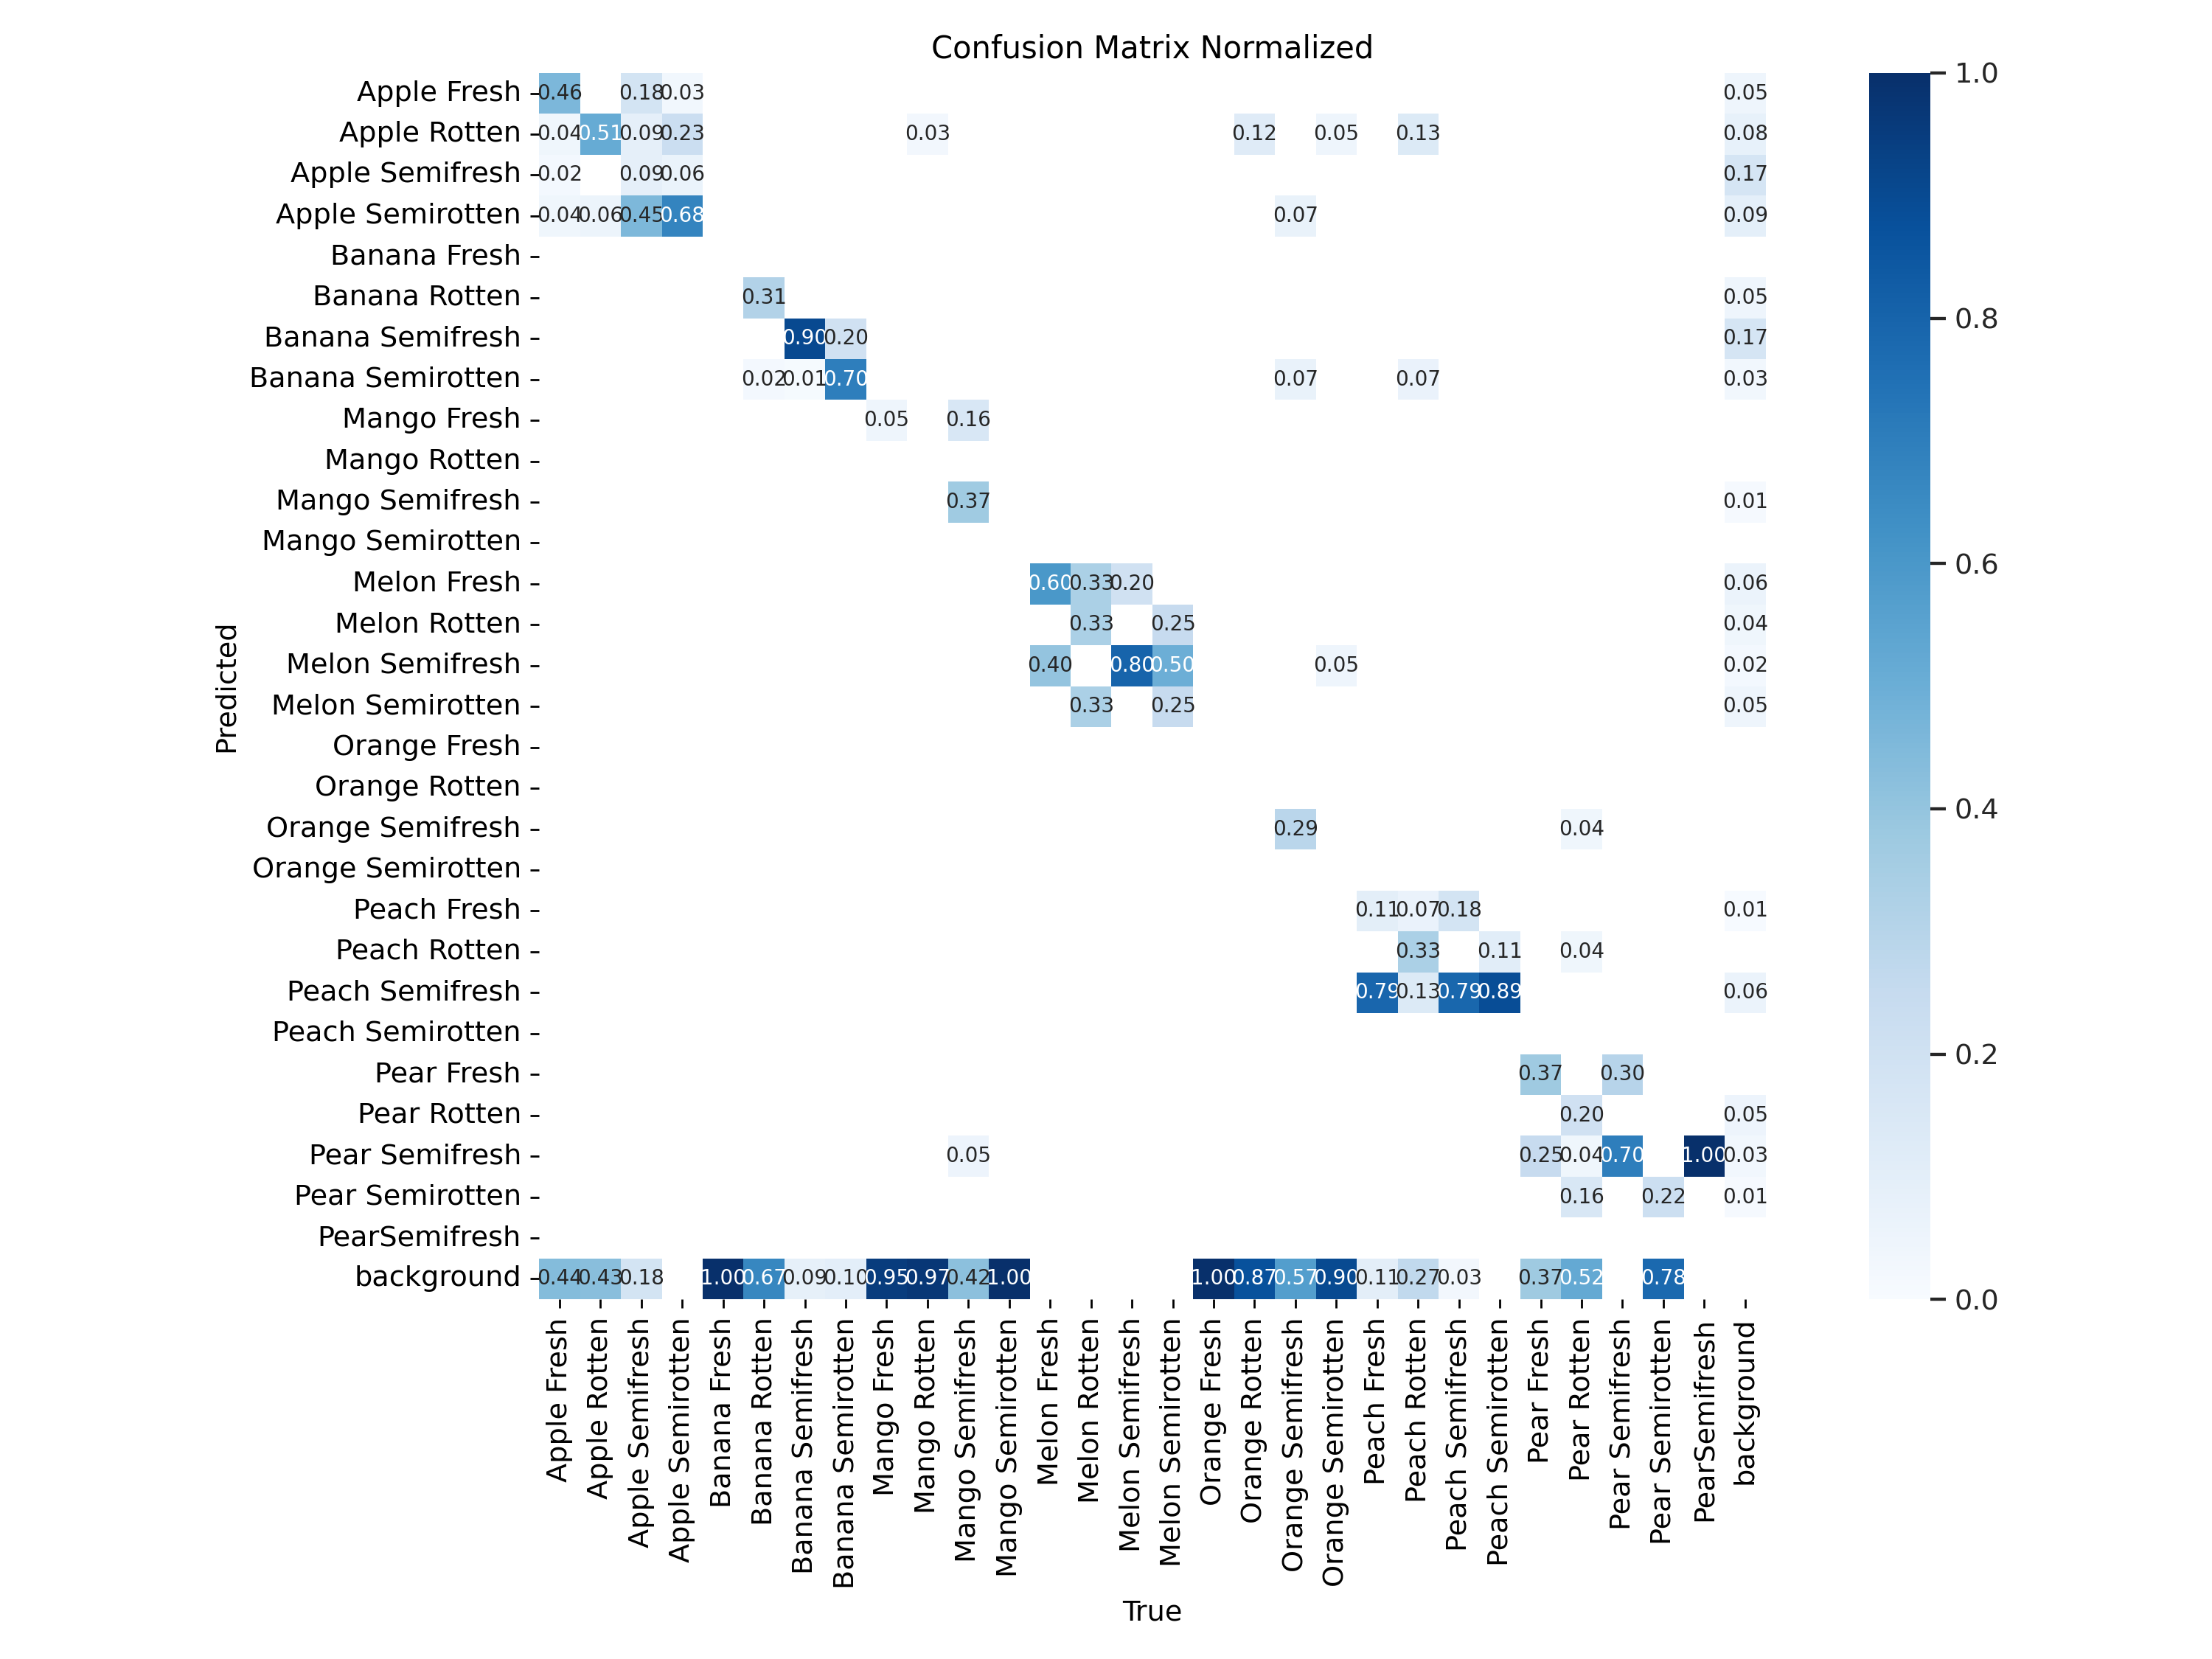

In [7]:
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/detect/train22/confusion_matrix_normalized.png')

In [8]:
# Example of printing precision, recall, and F1 score
print(f"Precision: {metrics.box.mp}")
print(f"Recall: {metrics.box.mr}")
# F1 score can be calculated as:
f1_score = 2 * (metrics.box.mp * metrics.box.mr) / (metrics.box.mp + metrics.box.mr)
print(f"F1 Score: {f1_score}")

Precision: 0.6438084647165707
Recall: 0.3895338198726427
F1 Score: 0.4853864479707853


**Predictions**

In [9]:
from ultralytics import YOLO

# Load the fine-tuned model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/runs/detect/train2/weights/best.pt')

In [10]:
# Path to an existing image in your dataset
image_path = '/content/drive/MyDrive/Fruit_Data/test/images/banana_2-981-_jpg.rf.5f7f224d77485609803b6fc39de56b5d.jpg'  # Replace with an actual image file in your dataset


image 1/1 /content/drive/MyDrive/Fruit_Data/test/images/banana_2-981-_jpg.rf.5f7f224d77485609803b6fc39de56b5d.jpg: 1216x1216 2 Banana Rottens, 654.6ms
Speed: 15.1ms preprocess, 654.6ms inference, 5.3ms postprocess per image at shape (1, 3, 1216, 1216)
Results saved to runs/detect/predict2


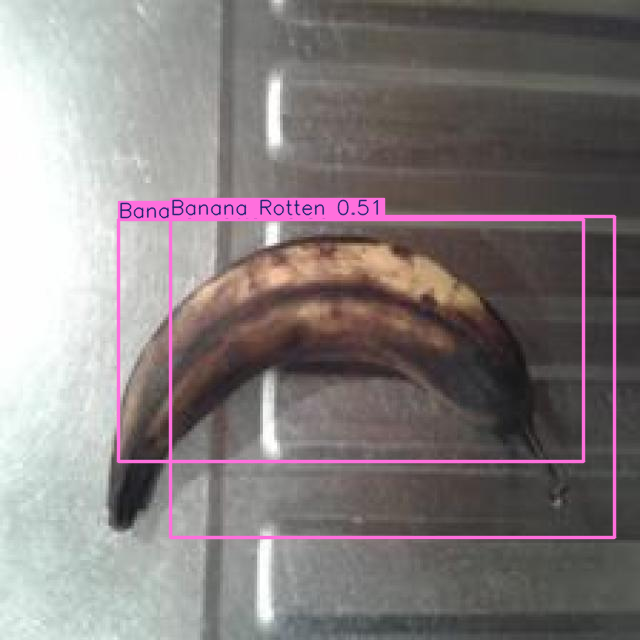

In [11]:
# Run prediction on the chosen dataset image
results = model.predict(source=image_path, save=True)

# Display the prediction
results[0].show()

In [12]:
# Path to an existing image in your dataset
image_path2 = '/content/drive/MyDrive/Fruit_Data/test/images/img137_png.rf.39d402681db77ab12a466cdc495f6b45.jpg'  # Replace with an actual image file in your dataset


image 1/1 /content/drive/MyDrive/Fruit_Data/test/images/img137_png.rf.39d402681db77ab12a466cdc495f6b45.jpg: 1216x1216 1 Apple Semirotten, 1069.0ms
Speed: 15.6ms preprocess, 1069.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1216, 1216)
Results saved to runs/detect/predict2


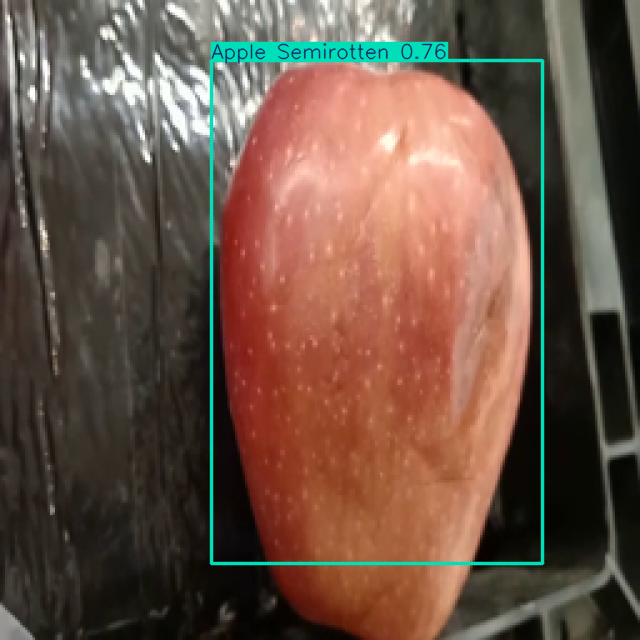

In [13]:
# Run prediction on the chosen dataset image
results = model.predict(source=image_path2, save=True)

# Display the prediction
results[0].show()

**Testing on Images from Internet**

In [17]:
# Path to an existing image in your dataset
image_path3 = '/content/drive/MyDrive/Fruit_Data/21160658001_front_a06_@2.png'  # Replace with an actual image file in your dataset


image 1/1 /content/drive/MyDrive/Fruit_Data/21160658001_front_a06_@2.png: 1216x1216 1 Apple Fresh, 1300.4ms
Speed: 44.3ms preprocess, 1300.4ms inference, 1.8ms postprocess per image at shape (1, 3, 1216, 1216)
Results saved to runs/detect/predict2


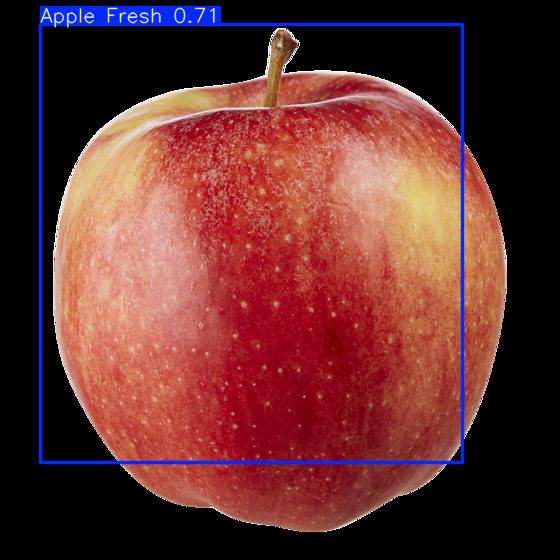

In [18]:
# Run prediction on the chosen dataset image
results = model.predict(source=image_path3, save=True)

# Display the prediction
results[0].show()

In [23]:
# Path to an existing image in your dataset
image_path4 = '/content/drive/MyDrive/Fruit_Data/p6.jpg'  # Replace with an actual image file in your dataset


image 1/1 /content/drive/MyDrive/Fruit_Data/p6.jpg: 1216x1216 1 Banana Fresh, 812.2ms
Speed: 17.6ms preprocess, 812.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1216, 1216)
Results saved to runs/detect/predict2


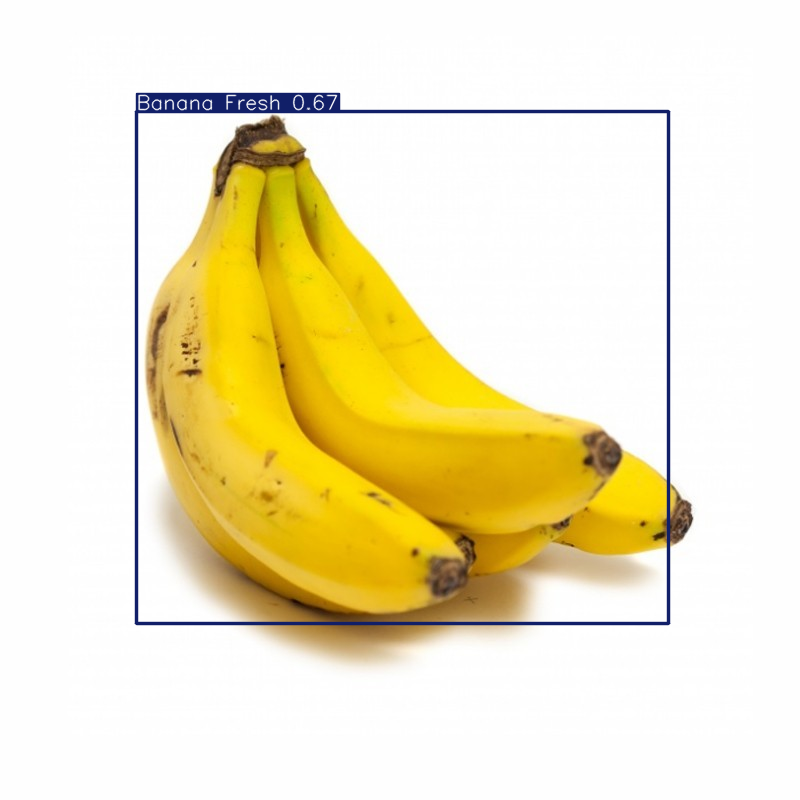

In [24]:
# Run prediction on the chosen dataset image
results = model.predict(source=image_path4, save=True)

# Display the prediction
results[0].show()